In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

DATA_DIR="/home/bijan/.kaggle/competitions/home-credit-default-risk"
print(os.listdir(DATA_DIR))

['installments_payments.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', '.Rhistory', 'POS_CASH_balance.csv', 'sample_submission.csv', 'application_test.csv', 'bureau_balance.csv', 'bureau.csv', 'previous_application.csv', 'application_train.csv']


In [7]:
PATH=DATA_DIR

application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

In [8]:
application_train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

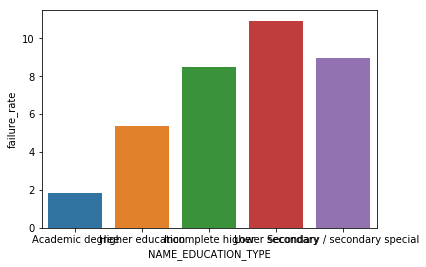

In [9]:
# how does education level impact loan failure?
by_edu = application_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET'])[['SK_ID_CURR']].count()
by_edu.reset_index(inplace=True)
totals = application_train.groupby(['NAME_EDUCATION_TYPE'])[['SK_ID_CURR']].count()
by_edu = by_edu.merge(totals, on='NAME_EDUCATION_TYPE')
by_edu['failure_rate'] = by_edu.SK_ID_CURR_x / by_edu.SK_ID_CURR_y * 100
by_edu.rename(columns={'SK_ID_CURR_x': 'num_failures', 'SK_ID_CURR_y': 'total_loans'}, inplace=True)
# by_edu[by_edu.TARGET == 1]
sns.barplot(x='NAME_EDUCATION_TYPE', y='failure_rate', data=by_edu[by_edu.TARGET == 1])

In [10]:
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [11]:
pos_days_employed = application_train[application_train.DAYS_EMPLOYED > 0]
len(pos_days_employed)

55374

In [12]:
print(application_train['DAYS_BIRTH'].describe())
print(pos_days_employed['DAYS_BIRTH'].describe())

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64
count    55374.000000
mean    -21810.009373
std       2008.084123
min     -25229.000000
25%     -23173.000000
50%     -22051.000000
75%     -20839.000000
max      -7691.000000
Name: DAYS_BIRTH, dtype: float64


In [13]:
application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN
5,NaN,0.354225,0.621226
6,0.774761,0.724000,0.492060
7,NaN,0.714279,0.540654
8,0.587334,0.205747,0.751724
9,NaN,0.746644,NaN


In [14]:
# how does income affect the target?
income = application_train[['SK_ID_CURR', 'TARGET','AMT_INCOME_TOTAL']]
income.groupby('TARGET')[['AMT_INCOME_TOTAL']].mean()

,AMT_INCOME_TOTAL
TARGET,
0,169077.722266
1,165611.760906


In [15]:
num_rows = len(application_train)
training_df = application_train[0:int(num_rows/2)]
validation_df= application_train[int(num_rows/2)+1:]

In [16]:
# loan failures by occupation
by_occ = training_df.groupby('OCCUPATION_TYPE')[['SK_ID_CURR']].count()
by_occ = by_occ.merge(training_df.groupby('OCCUPATION_TYPE')[['TARGET']].sum(), on='OCCUPATION_TYPE')
by_occ.columns = ['num_loans', 'num_failures']
by_occ['failure_rate'] = by_occ.num_failures / by_occ.num_loans
by_occ

,num_loans,num_failures,failure_rate
OCCUPATION_TYPE,,,
Accountants,4963,253,0.050977
Cleaning staff,2304,224,0.097222
Cooking staff,2999,318,0.106035
Core staff,13801,890,0.064488
Drivers,9295,1016,0.109306
HR staff,290,20,0.068966
High skill tech staff,5641,347,0.061514
IT staff,258,14,0.054264
Laborers,27659,3003,0.108572


In [17]:
# average income by occupation and loan success
by_occ = training_df.groupby(['OCCUPATION_TYPE', 'TARGET'])[['AMT_INCOME_TOTAL', 'CNT_CHILDREN']].mean()
by_occ

AMT_INCOME_TOTAL  CNT_CHILDREN
OCCUPATION_TYPE       TARGET                                
Accountants           0          194649.742357      0.482378
                      1          173816.217391      0.474308
Cleaning staff        0          132001.526683      0.360096
                      1          127033.593750      0.433036
Cooking staff         0          139205.600752      0.472212
                      1          135600.000000      0.525157
Core staff            0          172717.740690      0.559291
                      1          158120.089888      0.538202
Drivers               0          187946.777256      0.514917
                      1          179534.719488      0.472441
HR staff              0          186508.583333      0.477778
                      1          170325.000000      0.250000
High skill tech staff 0          183714.610979      0.476766
                      1          175653.622478      0.489914
IT staff              0          219789.663934      0.389344
                      1          148500.000000      0.357143
Laborers              0          164305.952311      0.511397
                      1          199876.781718      0.538795
Low-skill Laborers    0          131998.348608      0.482599
                      1          128335.838150      0.358382
Managers              0          263119.129292      0.509140
                      1          258086.236567      0.567164
Medicine staff        0          150702.380015      0.484151
                      1          138301.504983      0.588040
Private service staff 0          181844.034940      0.506827
                      1          157452.631579      0.568421
Realty agents         0          193486.764706      0.482353
                      1          194225.806452      0.483871
Sales staff           0          152541.086466      0.492736
                      1          148319.706266      0.581593
Secretaries           0          158512.705546      0.518760
                      1          154116.857143      0.666667
Security staff        0          150814.095847      0.382724
                      1          147056.509695      0.329640
Waiters/barmen staff  0          144983.680369      0.407718
                      1          143611.111111      0.543210

In [18]:
it_df = training_df[training_df.OCCUPATION_TYPE == 'IT staff']
it_df.shape

(258, 122)

In [19]:
x = it_df.groupby('TARGET').mean()
x.to_dict()

{'AMT_ANNUITY': {0: 29613.485655737706, 1: 26588.25},
 'AMT_CREDIT': {0: 649352.8586065574, 1: 592074.6428571428},
 'AMT_GOODS_PRICE': {0: 593241.7037037037, 1: 540642.8571428572},
 'AMT_INCOME_TOTAL': {0: 219789.66393442624, 1: 148500.0},
 'AMT_REQ_CREDIT_BUREAU_DAY': {0: 0.0, 1: 0.0},
 'AMT_REQ_CREDIT_BUREAU_HOUR': {0: 0.018433179723502304,
  1: 0.09090909090909091},
 'AMT_REQ_CREDIT_BUREAU_MON': {0: 0.22119815668202766, 1: 0.09090909090909091},
 'AMT_REQ_CREDIT_BUREAU_QRT': {0: 0.21658986175115208, 1: 0.36363636363636365},
 'AMT_REQ_CREDIT_BUREAU_WEEK': {0: 0.02304147465437788,
  1: 0.09090909090909091},
 'AMT_REQ_CREDIT_BUREAU_YEAR': {0: 1.400921658986175, 1: 2.0},
 'APARTMENTS_AVG': {0: 0.1357677419354839, 1: 0.15136666666666668},
 'APARTMENTS_MEDI': {0: 0.13728580645161298, 1: 0.15285},
 'APARTMENTS_MODE': {0: 0.13044967741935487, 1: 0.15421666666666667},
 'BASEMENTAREA_AVG': {0: 0.09406934306569346, 1: 0.08048},
 'BASEMENTAREA_MEDI': {0: 0.09226934306569347, 1: 0.08048},
 'BASEM

In [20]:
# how do number of kids affect loan failure?
# people who have more kids seem to have more failures
by_target = training_df.groupby('TARGET').count()
by_target.rename(columns={'SK_ID_CURR': 'num_loans'}, inplace=True)
by_target = by_target[['num_loans']]
children = training_df[['TARGET','CNT_CHILDREN', 'AMT_INCOME_TOTAL']].groupby('TARGET').mean()
children
by_target.merge(children, on='TARGET')

,num_loans,CNT_CHILDREN,AMT_INCOME_TOTAL
TARGET,,,
0,141214,0.413790,168818.196121
1,12541,0.467427,170085.714895


In [21]:
application_train.NAME_CONTRACT_TYPE.unique()
NAME_CONTRACT_TYPE = {
    'Cash loans': 0,
    'Revolving loans': 1
}

# application_train[application_train.NAME_CONTRACT_TYPE == 'Cash loans']
# application_train.NAME_CONTRACT_TYPE.apply(lambda x: NAME_CONTRACT_TYPE[x])

In [22]:
# how many loans are there by type?
# how does the failure rate differ by type?
counts = application_train[
    ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'TARGET']
].groupby(['NAME_CONTRACT_TYPE', 'TARGET'])[['TARGET']].count()
counts.columns = ['num_loans']
counts.reset_index(inplace=True)
total_loans_by_type = counts.groupby('NAME_CONTRACT_TYPE')[['num_loans']].sum()
total_loans_by_type.columns = ['total_loans']
counts = counts.merge(total_loans_by_type, how='left', on='NAME_CONTRACT_TYPE')
counts['perc_of_total'] = counts.num_loans / counts.total_loans
counts[counts.TARGET==1]

,NAME_CONTRACT_TYPE,TARGET,num_loans,total_loans,perc_of_total
1,Cash loans,1,23221,278232,0.083459
3,Revolving loans,1,1604,29279,0.054783


In [23]:
{
    "number of loan failures (target=1)": len(application_train[application_train.TARGET == 1]),
    "number of loan successes (target=0)": len(application_train[application_train.TARGET == 0])
}

{'number of loan failures (target=1)': 24825,
 'number of loan successes (target=0)': 282686}

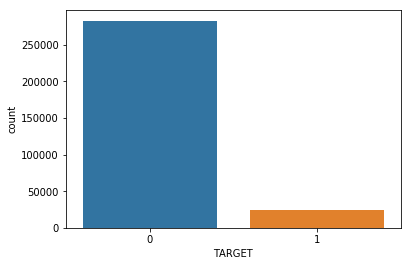

In [24]:
sns.countplot(application_train.TARGET)
plt.show()
# TARGET value 0 means loan is repayed, value 1 means loan is not repayed.

In [25]:
df = application_train.merge(bureau, how='left', on='SK_ID_CURR')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0.0,40761.000,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0.0,0.000,0.00,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0.0,135000.000,0.00,0.000,0.0,Consumer credit,-1185.0,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0.0,19071.000,NaN,NaN,0.0,Consumer credit,-906.0,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0.0,120735.000,0.00,0.000,0.0,Consumer credit,-34.0,0.0
5,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,40.500,0.0,31988.565,0.00,31988.565,0.0,Credit card,-24.0,0.0
6,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,0.0,450000.000,245781.00,0.000,0.0,Consumer credit,-7.0,0.0
7,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-967.0,0.000,0.0,67500.000,NaN,NaN,0.0,Credit card,-758.0,0.0
8,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-2131.0,0.000,0.0,22248.000,0.00,0.000,0.0,Consumer credit,-2131.0,NaN
9,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-540.0,0.000,0.0,112500.000,0.00,0.000,0.0,Credit card,-540.0,NaN


In [26]:
# how many credit accounts per loan
bureaus_per_loan = df[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').agg('count')
bureaus_per_loan.head(5)

,SK_ID_BUREAU
SK_ID_CURR,
100002,8
100003,4
100004,2
100006,0
100007,1


In [27]:
print("creditors: " + str(len(bureau)))
print("train: " + str(len(application_train)))
print("test: " + str(len(application_test)))

creditors: 1716428
train: 307511
test: 48744


In [28]:
len(df)

1509345

In [29]:
bureaus_per_loan['SK_ID_CURR'] = bureaus_per_loan.index
bureaus_per_loan.head(10)

,SK_ID_BUREAU,SK_ID_CURR
SK_ID_CURR,,
100002,8,100002
100003,4,100003
100004,2,100004
100006,0,100006
100007,1,100007
100008,3,100008
100009,18,100009
100010,2,100010
100011,4,100011


In [30]:
b = bureaus_per_loan.merge(application_train[['SK_ID_CURR', 'TARGET']], how='left', on='SK_ID_CURR')
b

/home/bijan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 'SK_ID_CURR' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


,SK_ID_BUREAU,SK_ID_CURR,TARGET
0,8,100002,1
1,4,100003,0
2,2,100004,0
3,0,100006,0
4,1,100007,0
5,3,100008,0
6,18,100009,0
7,2,100010,0
8,4,100011,0
9,0,100012,0


In [31]:
num_creditors = b.groupby(['SK_ID_BUREAU', 'TARGET']).count()
num_creditors.columns = ['num_loans']
num_creditors.index.names = ['num_creditors', 'target']
num_creditors.head(10)
num_creditors.reset_index(inplace=True)
num_creditors.head()

,num_creditors,target,num_loans
0,0,0,39563
1,0,1,4457
2,1,0,32974
3,1,1,3098
4,2,0,32851


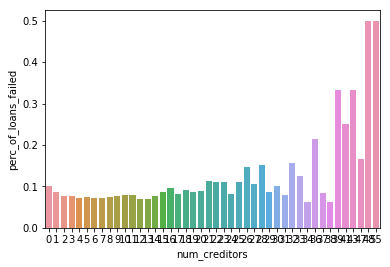

In [32]:
# percentage of loan failures based on the number of creditors
total_loans = num_creditors.groupby('num_creditors')[['num_loans']].sum()
total_loans.columns = ['total_loans']
df = num_creditors.merge(total_loans, how='left', on='num_creditors')
df['perc_of_loans'] = df.num_loans / df.total_loans
loan_failures = df[df.target == 1][['num_creditors', 'total_loans', 'perc_of_loans']]
loan_failures.columns = ['num_creditors', 'num_loans', 'perc_of_loans_failed']
loan_failures

import seaborn as sns

ax = sns.barplot(
    x="num_creditors", 
    y="perc_of_loans_failed", 
    data=loan_failures
)

In [33]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [34]:
application_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL  

In [35]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [37]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [38]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [39]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [40]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [41]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(application_train).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [42]:
missing_data(application_test).head(10)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


In [43]:
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

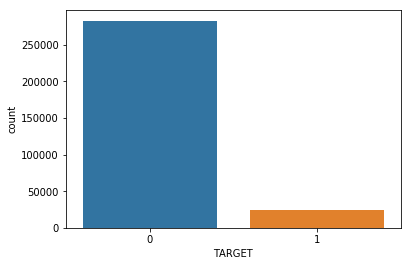

In [45]:
sns.countplot(application_train.TARGET)
plt.show()
# TARGET value 0 means loan is repayed, value 1 means loan is not repayed.

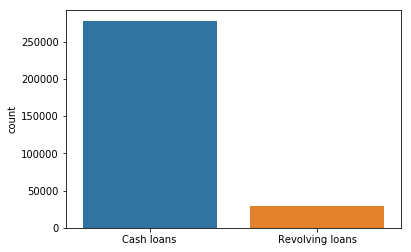

In [46]:
sns.countplot(application_train.NAME_CONTRACT_TYPE.values,data=application_train)

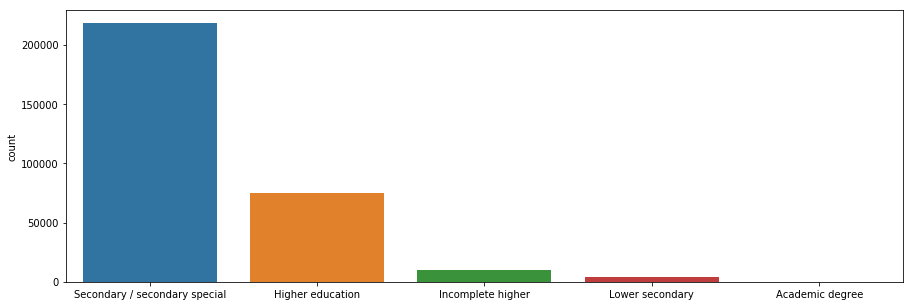

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(application_train.NAME_EDUCATION_TYPE.values,data=application_train)
plt.show()

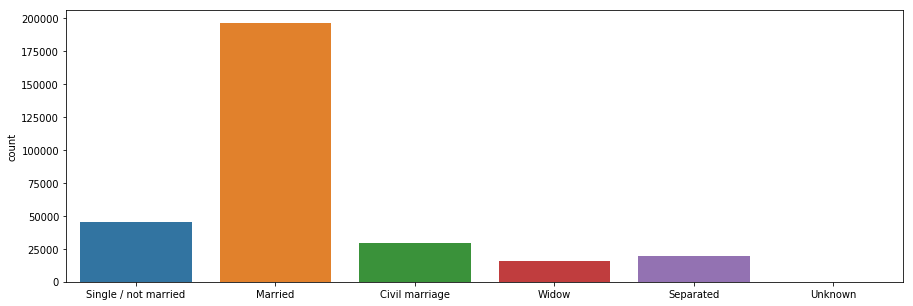

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(application_train.NAME_FAMILY_STATUS.values,data=application_train)
plt.show()

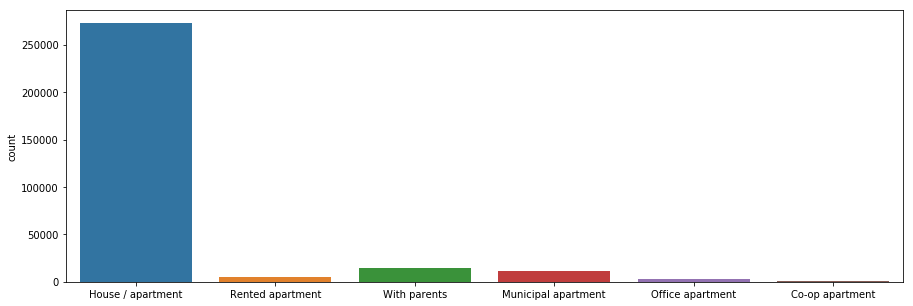

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(application_train.NAME_HOUSING_TYPE.values,data=application_train)
plt.show()

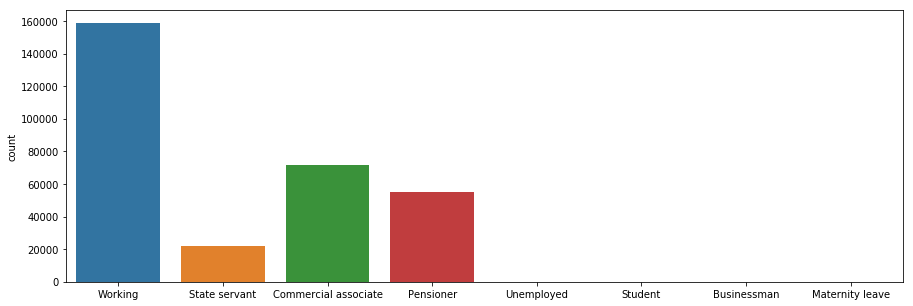

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(application_train.NAME_INCOME_TYPE.values,data=application_train)
plt.show()